In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gym Business

My gym recently changed its booking sessions to fewer times a day, and I noticed it feels busier. This is a silly little visualisation, asking - what's the best time to go right now?

Numbers were laboriously gathered off the gym booking website. (Next step is automate that, if it's within the T&C, and make smarter graphs).

In [2]:
file = "GymBooking.tsv"
df = pd.read_csv(file, sep="\t")
df.head()

Day      Date isWeekend   Time  TakenPlaces
0  Monday  12-10-20         n  06:30            6
1     NaN       NaN       NaN  07:45            5
2     NaN       NaN       NaN  09:00            5
3     NaN       NaN       NaN  10:15            2
4     NaN       NaN       NaN  11:30            5

Fill in empty values by copying Monday until Tuesday encountered etc

In [3]:
df = df.fillna(method="ffill")
df.head()

Day      Date isWeekend   Time  TakenPlaces
0  Monday  12-10-20         n  06:30            6
1  Monday  12-10-20         n  07:45            5
2  Monday  12-10-20         n  09:00            5
3  Monday  12-10-20         n  10:15            2
4  Monday  12-10-20         n  11:30            5

Ensure "Day" has ordered categories, that carry through to the heatmap:

In [4]:
df['Day'] = pd.Categorical(df.Day, categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
heatmap_cells = df.pivot("Time", "Day","TakenPlaces")

In [6]:
heatmap_cells

Day    Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Time                                                                 
06:30     6.0      4.0        8.0       7.0     5.0       NaN     NaN
07:45     5.0      6.0       13.0       4.0     8.0       NaN     NaN
08:00     NaN      NaN        NaN       NaN     NaN       7.0     2.0
09:00     5.0      5.0        4.0       3.0     5.0       NaN     NaN
09:15     NaN      NaN        NaN       NaN     NaN       5.0     5.0
10:15     2.0      4.0        1.0       2.0     1.0       NaN     NaN
10:30     NaN      NaN        NaN       NaN     NaN       8.0     1.0
11:30     5.0      8.0        6.0       6.0     6.0       NaN     NaN
11:45     NaN      NaN        NaN       NaN     NaN       8.0     6.0
12:45     7.0      8.0        8.0       9.0     5.0       NaN     NaN
13:00     NaN      NaN        NaN       NaN     NaN       6.0     2.0
14:00     5.0      6.0        5.0       7.0     5.0       NaN     NaN
14:15     NaN      NaN        NaN       NaN     NaN       4.0     2.0
15:15     7.0      9.0        6.0       5.0     7.0       NaN     NaN
15:30     NaN      NaN        NaN       NaN     NaN       3.0     6.0
16:30     9.0      9.0        8.0       5.0     5.0       NaN     NaN
16:45     NaN      NaN        NaN       NaN     NaN       9.0     8.0
17:45    16.0     13.0       13.0      15.0     5.0       NaN     NaN
18:00     NaN      NaN        NaN       NaN     NaN       5.0     8.0
19:00    14.0     12.0       12.0      12.0     5.0       NaN     NaN
19:15     NaN      NaN        NaN       NaN     NaN      13.0    12.0
20:15    14.0     12.0       10.0       2.0     2.0       NaN     NaN

Business heatmap, using a diverging palette - this highlights the interesting "extreme" ends.

NB, empty slots correspond to cleaning time between sessions.

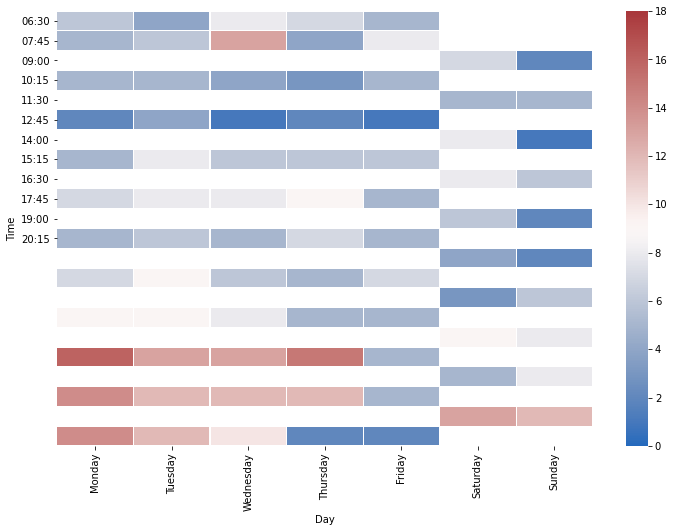

In [11]:
sns.heatmap(heatmap_cells,
            vmin=0, vmax=18,
            linewidths=.1, cmap=sns.color_palette("vlag", as_cmap=True),
           )
plt.gcf().set_size_inches(12,8)

Filtered to sessions that were acceptably busy for me - 5 or fewer people present (quite aggressive).

(NB: use the interval data, rather than the heatmap data for this percent - the heatmap data has a load of empty cells that we don't want to count.)

In [6]:
percent_henry_happy = 100 * len(df[df.TakenPlaces < 6]) / len(df)

print(f"Apparently {percent_henry_happy:.0f}% of slots are acceptably busy for my tastes")

Apparently 44% of slots are acceptably busy for my tastes


This is plotted below, using redder = emptier.

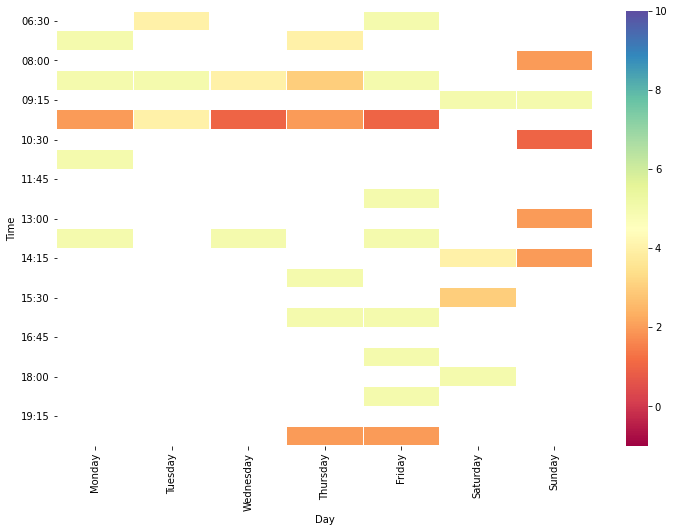

In [7]:
exclude = heatmap_cells > 5

sns.heatmap(heatmap_cells,
            linewidths=.1, vmax=10, vmin=-1,
            cmap=sns.color_palette("Spectral", as_cmap=True),
            mask=exclude
           )
plt.gcf().set_size_inches(12,8)


A few conclusions:
- Weekdays 9.15 is the sweet spot. Shame, because going then risks becoming tired rest of day / steals my most productive time...
- Sundays are pretty chill
- The 44% reasonable sessions number is higher than I expected (raising to 52% with a threshold of 6, instead) - no excuse not to go for a workout!

A few caveats:
- This is from one week in October - when lockdown restrictions ramped up, so the Friday evening + weekend data is probably not representative


### Follow ups:
- Record the pre-schedule change data - how much busier is the average session?
- Automate scraping of newer data; add code to aggregate over weeks
- Less offensive colour palettes